In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
from sklearn.tree import DecisionTreeRegressor

In [4]:
df = pd.read_csv('LeagueData.csv')

In [5]:
df.head()

,Name,ID,HP,HP per level,Mana,Mana per level,Movement speed,Armor,Armor per level,MR,MR per level,Range,Range type,HP regen,HP regen per level,Mana regen,Mana regen per level,AD,AD per level,Attack speed
0,Aatrox,1,650,114,0,0.0,345,38,4.45,32,2.05,175,Melee,3.00,1.00,0.0,0.0,60,5.00,0.651
1,Ahri,2,570,96,418,25.0,330,18,4.70,30,1.30,550,Ranged,2.50,0.60,8.0,0.8,53,3.00,0.668
2,Akali,3,570,119,200,0.0,345,23,4.70,37,2.05,125,Melee,9.00,0.90,50.0,0.0,62,3.30,0.625
3,Akshan,4,630,104,350,40.0,330,26,4.20,30,1.30,500,Ranged,3.75,0.65,8.2,0.7,52,3.50,0.638
4,Alistar,5,670,120,350,40.0,330,44,4.70,32,2.05,125,Melee,8.50,0.85,8.5,0.8,62,3.75,0.625


In [6]:
pd.set_option('display.max_columns', 20)

In [7]:
pd.set_option('display.max_rows', 20)

In [8]:
df.set_index('ID', inplace=True)

In [9]:
df.loc[1:7, 'Name':'MR per level']

,Name,HP,HP per level,Mana,Mana per level,Movement speed,Armor,Armor per level,MR,MR per level
ID,,,,,,,,,,
1,Aatrox,650,114,0,0.0,345,38,4.45,32,2.05
2,Ahri,570,96,418,25.0,330,18,4.70,30,1.30
3,Akali,570,119,200,0.0,345,23,4.70,37,2.05
4,Akshan,630,104,350,40.0,330,26,4.20,30,1.30
5,Alistar,670,120,350,40.0,330,44,4.70,32,2.05
6,Amumu,685,100,285,40.0,335,30,4.20,32,2.05
7,Anivia,550,96,495,45.0,325,21,5.20,30,1.30


In [10]:
filt = (df['Range type'] == 'Melee') & (df['Armor'] == 30)

In [11]:
df[filt]

,Name,HP,HP per level,Mana,Mana per level,Movement speed,Armor,Armor per level,MR,MR per level,Range,Range type,HP regen,HP regen per level,Mana regen,Mana regen per level,AD,AD per level,Attack speed
ID,,,,,,,,,,,,,,,,,,,
6,Amumu,685,100,285,40.0,335,30,4.2,32,2.05,125,Melee,9.0,0.85,7.40,0.55,53,3.8,0.736
112,Shaco,630,99,297,40.0,345,30,4.0,32,2.05,125,Melee,8.5,0.55,7.15,0.45,63,3.0,0.694
126,Talon,658,109,377,37.0,335,30,4.7,39,2.05,125,Melee,8.5,0.75,7.60,0.80,68,3.1,0.625
142,Vi,655,99,295,65.0,340,30,4.7,32,2.05,125,Melee,10.0,1.00,8.00,0.65,63,3.0,0.644
152,Yasuo,590,101,100,0.0,345,30,4.6,32,2.05,175,Melee,6.5,0.90,0.00,0.00,60,3.0,0.697


In [12]:
champs = ['Riven', 'Renekton', 'Ornn', 'Yone', 'LeBlanc', 'Akali']
filt2 = df['Name'].isin(champs)

In [13]:
df[filt2]

,Name,HP,HP per level,Mana,Mana per level,Movement speed,Armor,Armor per level,MR,MR per level,Range,Range type,HP regen,HP regen per level,Mana regen,Mana regen per level,AD,AD per level,Attack speed
ID,,,,,,,,,,,,,,,,,,,
3,Akali,570,119,200,0.0,345,23,4.7,37,2.05,125,Melee,9.0,0.90,50.0,0.0,62,3.30,0.625
66,LeBlanc,598,111,400,55.0,340,22,4.7,30,1.30,525,Ranged,7.5,0.55,8.0,1.0,55,3.50,0.625
91,Ornn,660,109,341,65.0,335,33,5.2,32,2.05,175,Melee,9.0,0.90,8.0,0.6,69,3.50,0.625
102,Renekton,660,111,100,0.0,345,35,5.2,32,2.05,125,Melee,8.0,0.75,0.0,0.0,69,4.15,0.665
104,Riven,630,100,0,0.0,340,33,4.4,32,2.05,125,Melee,8.5,0.50,0.0,0.0,64,3.00,0.625
153,Yone,620,99,500,0.0,345,28,4.6,32,2.05,175,Melee,7.5,0.75,0.0,0.0,60,2.00,0.625


In [14]:
df.loc[1]

Name                    Aatrox
HP                         650
HP per level               114
Mana                         0
Mana per level             0.0
Movement speed             345
Armor                       38
Armor per level           4.45
MR                          32
MR per level              2.05
Range                      175
Range type               Melee
HP regen                   3.0
HP regen per level         1.0
Mana regen                 0.0
Mana regen per level       0.0
AD                          60
AD per level               5.0
Attack speed             0.651
Name: 1, dtype: object

In [15]:
df.mean()

C:\Users\mda03\AppData\Local\Temp\ipykernel_11692\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


HP                      620.919753
HP per level            103.864198
Mana                    374.771605
Mana per level           37.240741
Movement speed          336.222222
Armor                    29.783951
Armor per level           4.642284
MR                       30.814815
MR per level              1.689506
Range                   325.802469
HP regen                  6.416667
HP regen per level        0.663580
Mana regen                8.193210
Mana regen per level      0.567284
AD                       59.074074
AD per level              3.220936
Attack speed              0.648475
dtype: float64

In [16]:
df.nlargest(10, 'HP')

,Name,HP,HP per level,Mana,Mana per level,Movement speed,Armor,Armor per level,MR,MR per level,Range,Range type,HP regen,HP regen per level,Mana regen,Mana regen per level,AD,AD per level,Attack speed
ID,,,,,,,,,,,,,,,,,,,
132,Tryndamere,696,112,100,0.0,345,33,4.3,32,2.05,125,Melee,8.50,0.90,0.00,0.00,72,3.70,0.670
36,Garen,690,98,0,0.0,340,36,4.2,32,1.55,175,Melee,8.00,0.50,0.00,0.00,66,4.50,0.625
131,Trundle,686,110,281,45.0,350,37,3.9,32,2.05,175,Melee,6.00,0.75,7.50,0.60,68,3.00,0.600
6,Amumu,685,100,285,40.0,335,30,4.2,32,2.05,125,Melee,9.00,0.85,7.40,0.55,53,3.80,0.736
48,Jax,685,99,339,52.0,350,36,4.2,32,2.05,125,Melee,8.50,0.55,7.60,0.70,68,4.25,0.638
156,Zac,685,109,0,0.0,340,33,4.7,32,2.05,175,Melee,8.00,0.50,0.00,0.00,60,3.40,0.736
134,Twitch,682,100,300,40.0,330,27,4.2,30,1.30,550,Ranged,3.75,0.60,7.25,0.70,59,3.10,0.679
25,Draven,675,104,361,39.0,330,29,4.5,30,1.30,550,Ranged,3.75,0.70,8.05,0.65,62,3.60,0.679
98,Rammus,675,94,310,33.0,335,40,5.5,32,2.05,125,Melee,8.00,0.55,7.85,0.50,55,3.50,0.656


In [17]:
df.describe()

,HP,HP per level,Mana,Mana per level,Movement speed,Armor,Armor per level,MR,MR per level,Range,HP regen,HP regen per level,Mana regen,Mana regen per level,AD,AD per level,Attack speed
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,620.919753,103.864198,374.771605,37.240741,336.222222,29.783951,4.642284,30.814815,1.689506,325.802469,6.416667,0.663580,8.193210,0.567284,59.074074,3.220936,0.648475
std,40.424760,8.160278,770.210516,20.015384,7.085108,6.561434,0.525131,1.705753,0.380847,192.898707,1.830555,0.142191,8.059101,0.294374,5.834738,0.659521,0.037506
min,410.000000,79.000000,0.000000,0.000000,325.000000,17.000000,0.000000,22.000000,1.100000,125.000000,2.500000,0.400000,0.000000,0.000000,40.000000,0.000000,0.475000
25%,600.000000,99.000000,280.000000,26.500000,330.000000,25.000000,4.312500,30.000000,1.300000,125.000000,5.500000,0.550000,6.500000,0.412500,55.000000,3.000000,0.625000
50%,630.000000,104.000000,328.500000,40.000000,335.000000,29.000000,4.700000,30.000000,2.050000,175.000000,6.500000,0.600000,7.595000,0.675000,60.000000,3.120800,0.644000
75%,650.000000,109.000000,396.250000,50.000000,340.000000,34.750000,4.950000,32.000000,2.050000,525.000000,8.000000,0.750000,8.000000,0.800000,63.000000,3.500000,0.665000
max,696.000000,129.000000,10000.000000,87.000000,355.000000,47.000000,5.500000,39.000000,2.550000,650.000000,10.000000,1.250000,50.000000,1.000000,72.000000,5.000000,0.850000


In [18]:
df['Range type'].value_counts()

Melee     84
Ranged    78
Name: Range type, dtype: int64

In [19]:
RangeTypegrp = df.groupby(['Range type'])

In [20]:
RangeTypegrp.get_group('Melee')

,Name,HP,HP per level,Mana,Mana per level,Movement speed,Armor,Armor per level,MR,MR per level,Range,Range type,HP regen,HP regen per level,Mana regen,Mana regen per level,AD,AD per level,Attack speed
ID,,,,,,,,,,,,,,,,,,,
1,Aatrox,650,114,0,0.0,345,38,4.45,32,2.05,175,Melee,3.0,1.00,0.0,0.00,60,5.00,0.651
3,Akali,570,119,200,0.0,345,23,4.70,37,2.05,125,Melee,9.0,0.90,50.0,0.00,62,3.30,0.625
5,Alistar,670,120,350,40.0,330,44,4.70,32,2.05,125,Melee,8.5,0.85,8.5,0.80,62,3.75,0.625
6,Amumu,685,100,285,40.0,335,30,4.20,32,2.05,125,Melee,9.0,0.85,7.4,0.55,53,3.80,0.736
14,Bel'Veth,610,99,60,0.0,340,32,4.70,32,2.05,175,Melee,6.0,0.60,0.0,0.00,60,1.70,0.850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Yasuo,590,101,100,0.0,345,30,4.60,32,2.05,175,Melee,6.5,0.90,0.0,0.00,60,3.00,0.697
153,Yone,620,99,500,0.0,345,28,4.60,32,2.05,175,Melee,7.5,0.75,0.0,0.00,60,2.00,0.625
154,Yorick,650,114,300,60.0,340,39,5.20,32,2.05,175,Melee,8.0,0.80,7.5,0.75,62,5.00,0.625


In [21]:
RangeTypegrp['Armor'].value_counts()

Range type  Armor
Melee       33       9
            32       8
            36       8
            38       8
            34       7
                    ..
Ranged      34       2
            17       1
            30       1
            33       1
            36       1
Name: Armor, Length: 40, dtype: int64

In [22]:
RangeTypegrp[['HP', 'Armor']].agg(['median', 'mean'])

HP              Armor           
           median        mean median       mean
Range type                                     
Melee       644.5  636.869048   34.0  34.178571
Ranged      601.5  603.743590   25.5  25.051282

In [23]:
df.reset_index(inplace=True)

In [24]:
#df.to_json('champ.json', orient='records', lines=True)

In [46]:
champ_x = df['HP']

In [47]:
champ_y = df['Armor']

<BarContainer object of 162 artists>

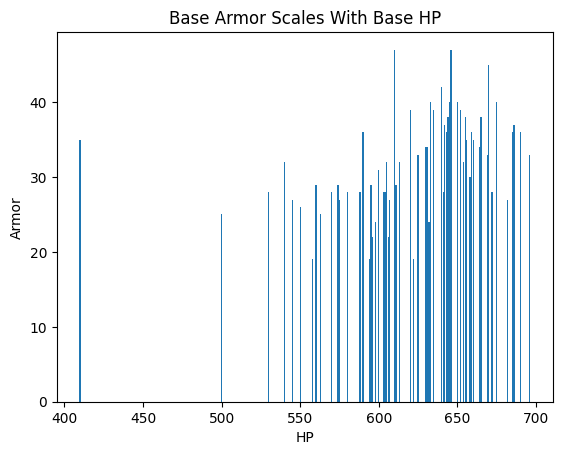

In [48]:
plt.xlabel('HP')
plt.ylabel('Armor')
plt.title('Base Armor Scales With Base HP')
plt.bar(champ_x, champ_y)

In [28]:
df[df['HP'] < 550].sort_values('HP')

,ID,Name,HP,HP per level,Mana,Mana per level,Movement speed,Armor,Armor per level,MR,MR per level,Range,Range type,HP regen,HP regen per level,Mana regen,Mana regen per level,AD,AD per level,Attack speed
62,63,Kled,410,84,100,0.0,345,35,5.2,28,2.05,125,Melee,6.0,0.75,0.0,0.0,65,3.5,0.625
154,155,Yuumi,500,84,400,45.0,330,25,4.2,25,1.10,425,Ranged,5.0,0.55,10.0,0.4,49,3.1,0.625
108,109,Senna,530,89,350,45.0,330,28,4.7,30,1.30,600,Ranged,3.5,0.55,11.5,0.7,50,0.0,0.625
36,37,Gnar,540,79,100,0.0,335,32,3.7,30,1.30,175,Melee,4.5,1.25,0.0,0.0,57,3.0,0.625
100,101,Renata Glasc,545,94,350,50.0,330,27,4.7,30,1.30,550,Ranged,5.5,0.55,11.5,0.5,49,3.0,0.625


In [29]:
df.columns

Index(['ID', 'Name', 'HP', 'HP per level', 'Mana', 'Mana per level',
       'Movement speed', 'Armor', 'Armor per level', 'MR', 'MR per level',
       'Range', 'Range type', 'HP regen', 'HP regen per level', 'Mana regen',
       'Mana regen per level', 'AD', 'AD per level', 'Attack speed'],
      dtype='object')

In [30]:
y = df['Armor']

In [31]:
champFeatures = ['HP', 'Mana', 'Armor per level', 'MR', 'Range', 'HP regen', 'AD', 'AD per level', 'Attack speed']

In [32]:
x = df[champFeatures]

In [33]:
x.describe()

,HP,Mana,Armor per level,MR,Range,HP regen,AD,AD per level,Attack speed
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,620.919753,374.771605,4.642284,30.814815,325.802469,6.416667,59.074074,3.220936,0.648475
std,40.424760,770.210516,0.525131,1.705753,192.898707,1.830555,5.834738,0.659521,0.037506
min,410.000000,0.000000,0.000000,22.000000,125.000000,2.500000,40.000000,0.000000,0.475000
25%,600.000000,280.000000,4.312500,30.000000,125.000000,5.500000,55.000000,3.000000,0.625000
50%,630.000000,328.500000,4.700000,30.000000,175.000000,6.500000,60.000000,3.120800,0.644000
75%,650.000000,396.250000,4.950000,32.000000,525.000000,8.000000,63.000000,3.500000,0.665000
max,696.000000,10000.000000,5.500000,39.000000,650.000000,10.000000,72.000000,5.000000,0.850000


In [34]:
x.head()

,HP,Mana,Armor per level,MR,Range,HP regen,AD,AD per level,Attack speed
0,650,0,4.45,32,175,3.00,60,5.00,0.651
1,570,418,4.70,30,550,2.50,53,3.00,0.668
2,570,200,4.70,37,125,9.00,62,3.30,0.625
3,630,350,4.20,30,500,3.75,52,3.50,0.638
4,670,350,4.70,32,125,8.50,62,3.75,0.625


In [35]:
champModel = DecisionTreeRegressor(random_state=1)

In [36]:
champModel.fit(x, y)

DecisionTreeRegressor(random_state=1)

In [37]:
#Making predictions for 
x.head()

,HP,Mana,Armor per level,MR,Range,HP regen,AD,AD per level,Attack speed
0,650,0,4.45,32,175,3.00,60,5.00,0.651
1,570,418,4.70,30,550,2.50,53,3.00,0.668
2,570,200,4.70,37,125,9.00,62,3.30,0.625
3,630,350,4.20,30,500,3.75,52,3.50,0.638
4,670,350,4.70,32,125,8.50,62,3.75,0.625


In [38]:
champModel.predict(x.head())

array([38., 18., 23., 26., 44.])

In [39]:
df.head()

,ID,Name,HP,HP per level,Mana,Mana per level,Movement speed,Armor,Armor per level,MR,MR per level,Range,Range type,HP regen,HP regen per level,Mana regen,Mana regen per level,AD,AD per level,Attack speed
0,1,Aatrox,650,114,0,0.0,345,38,4.45,32,2.05,175,Melee,3.00,1.00,0.0,0.0,60,5.00,0.651
1,2,Ahri,570,96,418,25.0,330,18,4.70,30,1.30,550,Ranged,2.50,0.60,8.0,0.8,53,3.00,0.668
2,3,Akali,570,119,200,0.0,345,23,4.70,37,2.05,125,Melee,9.00,0.90,50.0,0.0,62,3.30,0.625
3,4,Akshan,630,104,350,40.0,330,26,4.20,30,1.30,500,Ranged,3.75,0.65,8.2,0.7,52,3.50,0.638
4,5,Alistar,670,120,350,40.0,330,44,4.70,32,2.05,125,Melee,8.50,0.85,8.5,0.8,62,3.75,0.625


In [45]:
df.sort_values('Armor', ascending=False)

,ID,Name,HP,HP per level,Mana,Mana per level,Movement speed,Armor,Armor per level,MR,MR per level,Range,Range type,HP regen,HP regen per level,Mana regen,Mana regen per level,AD,AD per level,Attack speed
67,68,Leona,646,101,302,40.0,335,47,4.8,32,2.05,125,Melee,8.5,0.85,6.0,0.8,60,3.00,0.625
16,17,Braum,610,112,311,45.0,335,47,5.2,32,2.05,125,Melee,8.5,1.00,6.0,0.8,55,3.20,0.644
93,94,Pyke,670,104,415,50.0,330,45,4.7,32,2.05,150,Melee,7.0,0.50,8.0,1.0,62,2.00,0.667
4,5,Alistar,670,120,350,40.0,330,44,4.7,32,2.05,125,Melee,8.5,0.85,8.5,0.8,62,3.75,0.625
123,124,Tahm Kench,640,103,325,50.0,335,42,4.7,32,2.05,175,Melee,6.5,0.55,8.0,1.0,56,3.20,0.658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,125,Taliyah,550,104,470,30.0,330,18,4.7,30,1.30,525,Ranged,6.5,0.65,8.0,0.8,58,3.30,0.625
74,75,Malzahar,580,101,375,28.0,335,18,4.7,30,1.30,500,Ranged,6.0,0.60,8.0,0.8,55,3.00,0.625
1,2,Ahri,570,96,418,25.0,330,18,4.7,30,1.30,550,Ranged,2.5,0.60,8.0,0.8,53,3.00,0.668
19,20,Cassiopeia,630,104,350,60.0,328,18,4.7,32,1.30,550,Ranged,5.5,0.50,8.0,0.8,53,3.00,0.647
